# Impact of major chronic conditions on the lifestyle of people with diabetes/pre-diabetic/healthy people

**Overview**: In this practical application, lets try to understand the lifestyle of people with diabetes/pre-diabetic/healthy. Look at the impact of major chronic conditions like Cholestrol, High Blood Pressure, Heart Disease etc. along with patient habits of eating/smoking and drinking alcohol  



### Getting Started

University of California, Davis focused on such health care analytics studies and came across the dataset that I can use to source the data from and perform the analysis. The dataset is available at https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008



### Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [302]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [284]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

In [285]:
cdc_diabetes_health_indicators.data.features.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [286]:
from pprint import pprint
# metadata 
pprint(cdc_diabetes_health_indicators.metadata) 

{'abstract': 'The Diabetes Health Indicators Dataset contains healthcare '
             'statistics and lifestyle survey information about people in '
             'general along with their diagnosis of diabetes. The 35 features '
             'consist of some demographics, lab test results, and answers to '
             'survey questions for each patient. The target variable for '
             'classification is whether a patient has diabetes, is '
             'pre-diabetic, or healthy. ',
 'additional_info': {'citation': None,
                     'funded_by': 'The CDC',
                     'instances_represent': 'Each row represents a person '
                                            'participating in this study.',
                     'preprocessing_description': 'Bucketing of age',
                     'purpose': 'To better understand the relationship '
                                'between  lifestyle and diabetes in the US',
                     'recommended_data_splits':

In [287]:
# variable information 
print(cdc_diabetes_health_indicators.variables) 

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [288]:
cdc_diabetes_health_indicators.variables.head()

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no


In [289]:
cdc_diabetes_health_indicators.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.



```
                                          description units missing_values  
0                                          Patient ID  None             no  
1         0 = no diabetes 1 = prediabetes or diabetes  None             no  
2                          0 = no high BP 1 = high BP  None             no  
3        0 = no high cholesterol 1 = high cholesterol  None             no  
4   0 = no cholesterol check in 5 years 1 = yes ch...  None             no  
5                                     Body Mass Index  None             no  
6   Have you smoked at least 100 cigarettes in you...  None             no  
7        (Ever told) you had a stroke. 0 = no 1 = yes  None             no  
8   coronary heart disease (CHD) or myocardial inf...  None             no  
9   physical activity in past 30 days - not includ...  None             no  
10  Consume Fruit 1 or more times per day 0 = no 1...  None             no  
11  Consume Vegetables 1 or more times per day 0 =...  None             no  
12  Heavy drinkers (adult men having more than 14 ...  None             no  
13  Have any kind of health care coverage, includi...  None             no  
14  Was there a time in the past 12 months when yo...  None             no  
15  Would you say that in general your health is: ...  None             no  
16  Now thinking about your mental health, which i...  None             no  
17  Now thinking about your physical health, which...  None             no  
18  Do you have serious difficulty walking or clim...  None             no  
19                                0 = female 1 = male  None             no  
20  13-level age category (_AGEG5YR see codebook) ...  None             no  
21  Education level (EDUCA see codebook) scale 1-6...  None             no  
22  Income scale (INCOME2 see codebook) scale 1-8 ...  None             no  
```


In [290]:
cdc_diabetes_health_indicators.data.targets.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


### Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

-- The business objective is to understand the impact of chronic conditions on diabetes

### Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Look if there are any categorical features, prepare those features and target column for modeling with appropriate encoding and transformations.

In [291]:
# Combine the dataframes
df = cdc_diabetes_health_indicators.data.features[['BMI','HighBP','HighChol','HeartDiseaseorAttack','Smoker','HvyAlcoholConsump','PhysActivity']].join(cdc_diabetes_health_indicators.data.targets)
df.head(100)

,BMI,HighBP,HighChol,HeartDiseaseorAttack,Smoker,HvyAlcoholConsump,PhysActivity,Diabetes_binary
0,40,1,1,0,1,0,0,0
1,25,0,0,0,1,0,1,0
2,28,1,1,0,0,0,0,0
3,27,1,0,0,0,0,1,0
4,24,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
95,25,1,1,1,1,0,0,1
96,32,0,0,0,0,0,1,1
97,45,1,0,0,0,0,1,0
98,28,1,1,0,0,0,0,0


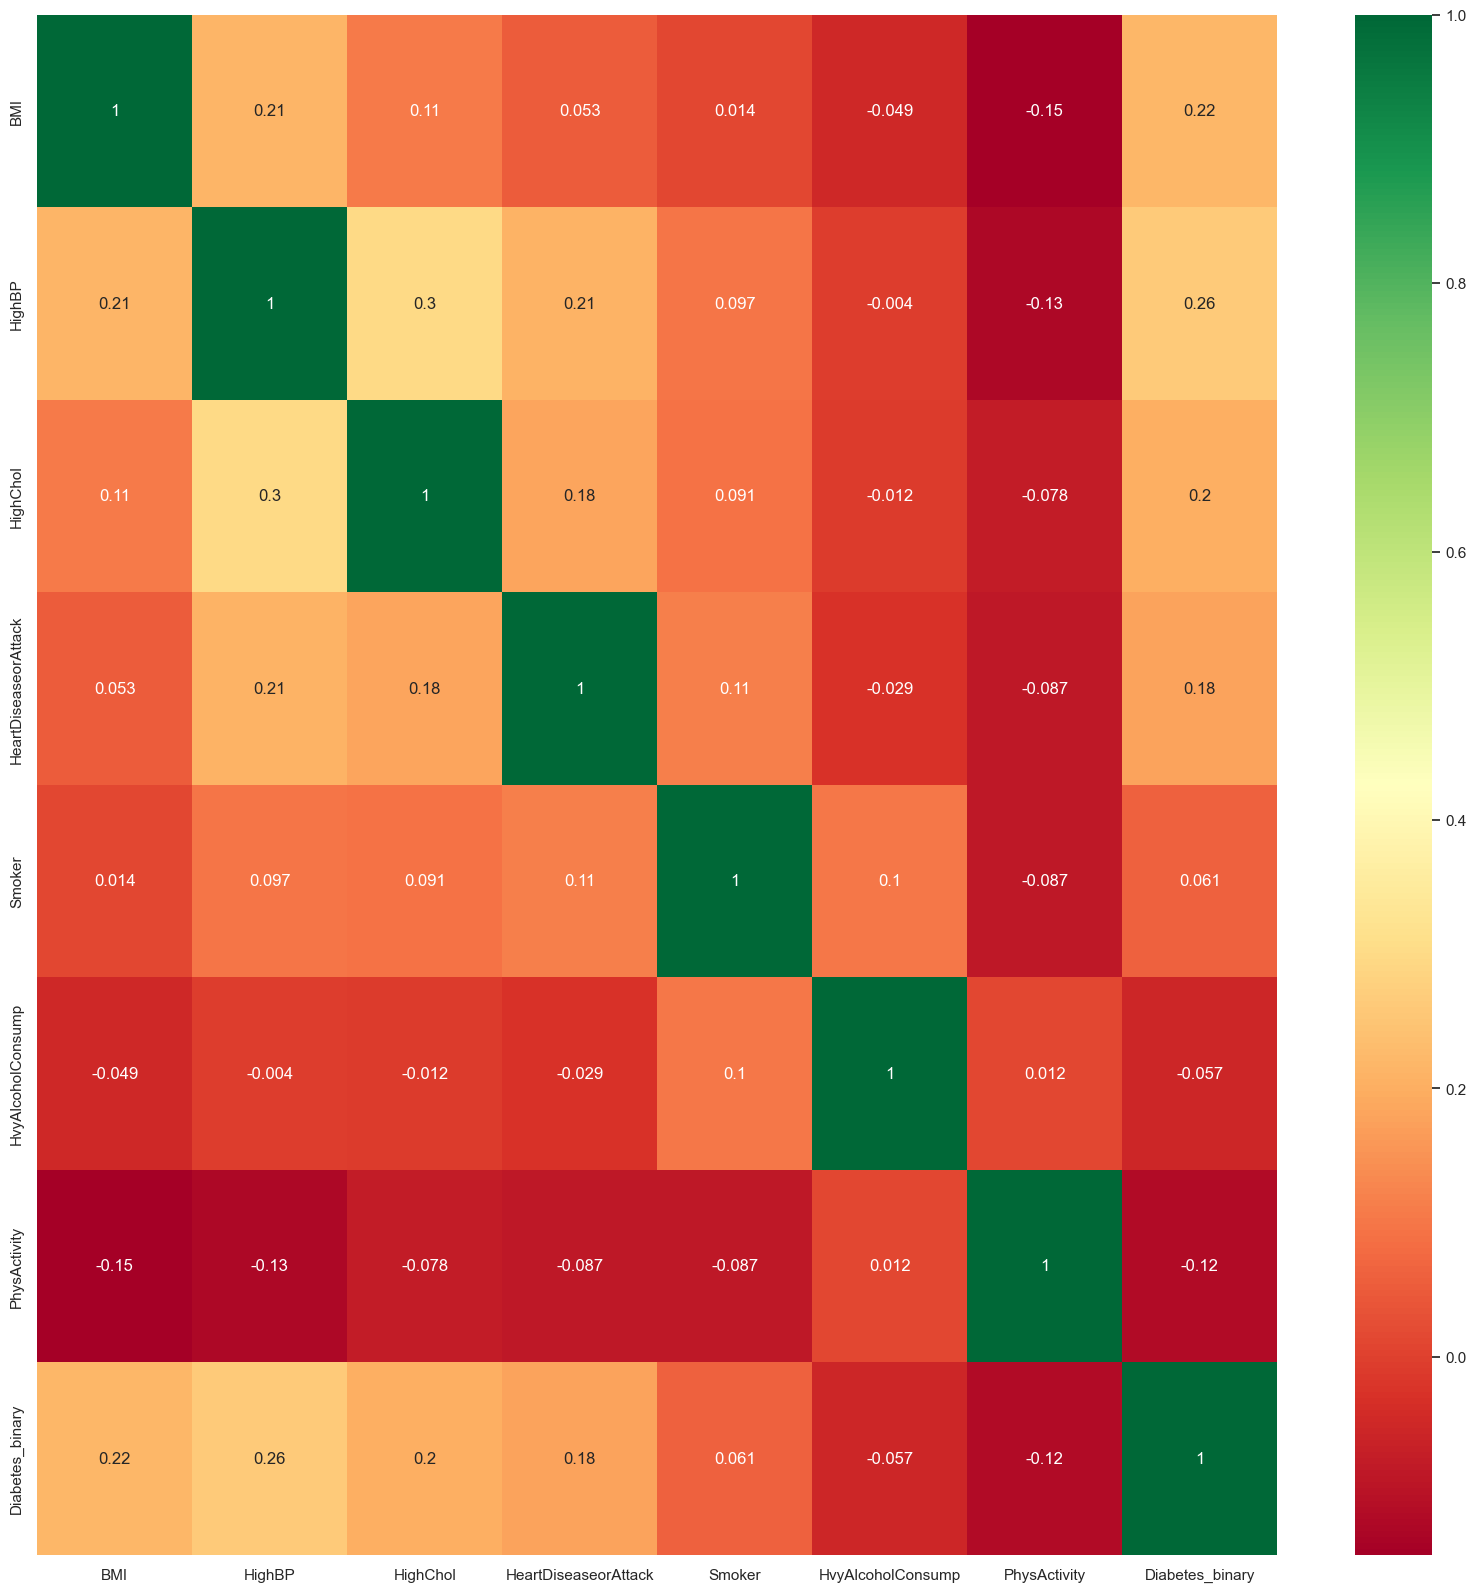

In [280]:
# Correlation Matrix Heatmap            
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [281]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
X[['BMI','HighBP','HighChol','HeartDiseaseorAttack','Smoker','HvyAlcoholConsump','PhysActivity']] = scaler.fit_transform(X[['BMI','HighBP','HighChol','HeartDiseaseorAttack','Smoker','HvyAlcoholConsump','PhysActivity']])
X.head()

,BMI,HighBP,HighChol,HeartDiseaseorAttack,Smoker,HvyAlcoholConsump,PhysActivity
0,1.757936,1.153688,1.165254,-0.322458,1.120927,-0.244014,-1.762814
1,-0.511806,-0.866785,-0.858182,-0.322458,1.120927,-0.244014,0.567275
2,-0.057858,1.153688,1.165254,-0.322458,-0.892119,-0.244014,-1.762814
3,-0.209174,1.153688,-0.858182,-0.322458,-0.892119,-0.244014,0.567275
4,-0.663122,1.153688,1.165254,-0.322458,-0.892119,-0.244014,0.567275


### Train/Test Split

With your data prepared, split it into a train and test set.

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [250]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

In [251]:
print(baseline_score)

0.8606709239987386


### Start with Simple  Logistic Regression Model

Use Logistic Regression to build a basic model on your data.  

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
lgr_model = LogisticRegression(max_iter=500)
start_time = time.time()
lgr_model.fit(X_train, y_train)
end_time = time.time()
y_lgr_pred = lgr_model.predict(X_test)

### Score the Model

What is the accuracy of your model?

In [254]:
lgr_score = accuracy_score(y_test, y_lgr_pred, normalize=True)
print(lgr_score)

0.8604146956795964


In [297]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_lgr_pred, labels=lgr_model.classes_)
print(cm)

[[43092   575]
 [ 6507   562]]


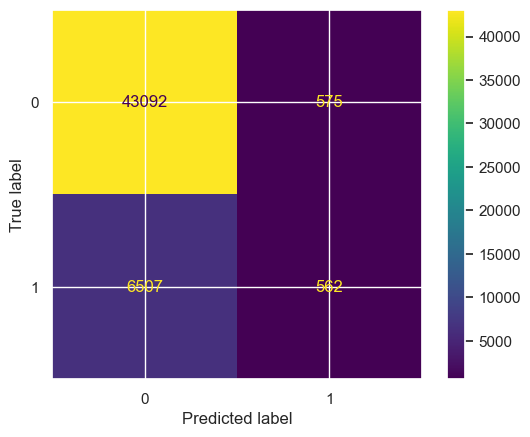

In [305]:
# Confusion Matrix Plot
color = 'green'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr_model.classes_)
disp.plot()
plt.show()

In [298]:
# Classification Report
print(classification_report(y_test, y_lgr_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     43667
           1       0.49      0.08      0.14      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.53      0.53     50736
weighted avg       0.82      0.86      0.81     50736


### Model Comparisons

Now, we aim to compare the performance of various classifiers including Logistic Regression,KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Capturing Fit Time, Score and Max Depth metrics can you provide insights into model performance:

| Model | Fit_Time | Score | Max_Depth |
| ----- |----------|-------|--------------------|
|     |          | .     | .                  |

In [255]:
results = pd.DataFrame({'Model': [], 'Fit_Time': [],'Score': [], 'Max_Depth': []})

In [256]:
# Logistic Regression
results = pd.concat([results, pd.DataFrame([{'Model': 'Logistic Regression', 'Fit_Time': end_time - start_time,'Score':lgr_score,'Max_Depth':0}])], ignore_index=True)

In [257]:
print(results)

                 Model  Fit_Time     Score  Max_Depth
0  Logistic Regression  0.122869  0.860415        0.0


KNN Algorithm

In [259]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
neighbors = list(range(1, 20, 2))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal K 19


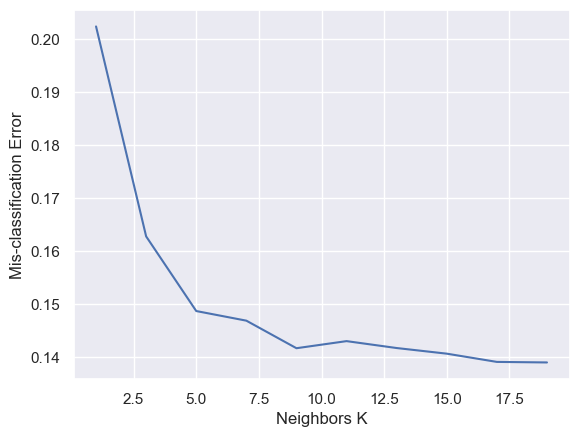

In [260]:
from matplotlib import pyplot as plt
mse = [1 - x for x in cv_scores] # calculate mis-classification error
optimal_k = neighbors[mse.index(min(mse))] # find optimal K
print("The optimal K {}".format(optimal_k))
plt.plot(neighbors, mse) # plot mis-classification error with K
plt.xlabel("Neighbors K")
plt.ylabel("Mis-classification Error")
plt.show()

In [261]:
knn_classifier = KNeighborsClassifier(n_neighbors=16)
start_time = time.time()
knn_classifier.fit(X_train, y_train)
end_time = time.time()

In [324]:
y_knn_pred=knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_knn_pred, labels=knn_classifier.classes_)
print(cm)

[[43037   630]
 [ 6435   634]]


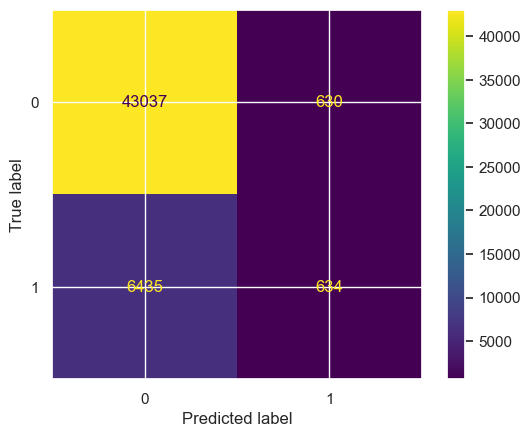

In [325]:
color = 'black'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot()
plt.show()

In [326]:
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print("The accuracy of KNN classifier is {}".format(100*knn_accuracy))

The accuracy of KNN classifier is 86.07497634815515


In [327]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     43667
           1       0.50      0.09      0.15      7069

    accuracy                           0.86     50736
   macro avg       0.69      0.54      0.54     50736
weighted avg       0.82      0.86      0.82     50736



In [271]:
results = pd.concat([results, pd.DataFrame([{'Model': 'K Nearest Neighbor', 'Fit_Time': end_time - start_time,'Score':knn_accuracy,'Max_Depth':0}])], ignore_index=True)

In [272]:
print(results)

                 Model   Fit_Time     Score  Max_Depth
0  Logistic Regression   0.122869  0.860415        0.0
1   K Nearest Neighbor  17.615237  0.860750        0.0


Decision Tree Classifier

In [273]:
from sklearn.tree import DecisionTreeClassifier

In [274]:
import numpy as np
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()
max_depths =list(range(1,12))
min_samples_splits =list(range(2,3))
min_samples_leafs = list(range(1,3))
criteria =['gini', 'entropy']
params = {'max_depth': max_depths,
         'min_samples_split': min_samples_splits,
          'criterion': criteria,
          'min_samples_leaf': min_samples_leafs
         }

grid_search = GridSearchCV(estimator = dt_classifier, param_grid=params, cv=5, scoring='accuracy')
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
grid_search_best_estimator = grid_search.best_estimator_
cv_results = grid_search.cv_results_
print(grid_search.best_score_ )
print(grid_search_best_estimator.max_depth)

0.8631987140047729
7


In [ ]:
y_pred = grid_search.predict(X_test)
dt_accuracy_score = accuracy_score(y_test, y_pred)

In [309]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     43667
           1       0.50      0.09      0.15      7069

    accuracy                           0.86     50736
   macro avg       0.69      0.54      0.54     50736
weighted avg       0.82      0.86      0.82     50736


In [310]:
cm = confusion_matrix(y_test, y_pred, labels=grid_search_best_estimator.classes_)
print(cm)

[[43037   630]
 [ 6435   634]]


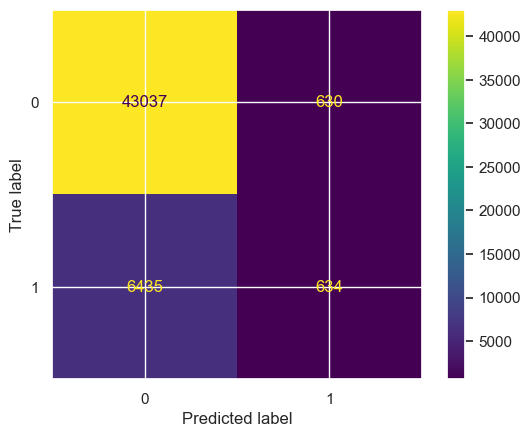

In [311]:
color = 'black'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_best_estimator.classes_)
disp.plot()
plt.show()

In [275]:
results = pd.concat([results, pd.DataFrame([{'Model': 'Decision Tree Classifier', 'Fit_Time': end_time - start_time,'Score':grid_search.best_score_,'Max_Depth':grid_search_best_estimator.max_depth}])], ignore_index=True)

SVM Classifier

In [276]:
from sklearn.svm import SVC
svc = SVC()

In [277]:
start_time = time.time()
svc.fit(X_train, y_train)
end_time = time.time()

In [296]:
y_svm_pred = svc.predict(X_test)
svm_default_accuracy_score = accuracy_score(y_test, y_svm_pred)

In [312]:
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     43667
           1       0.57      0.05      0.09      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.52      0.51     50736
weighted avg       0.83      0.86      0.81     50736


In [313]:
cm = confusion_matrix(y_test, y_svm_pred, labels=svc.classes_)
print(cm)

[[43402   265]
 [ 6714   355]]


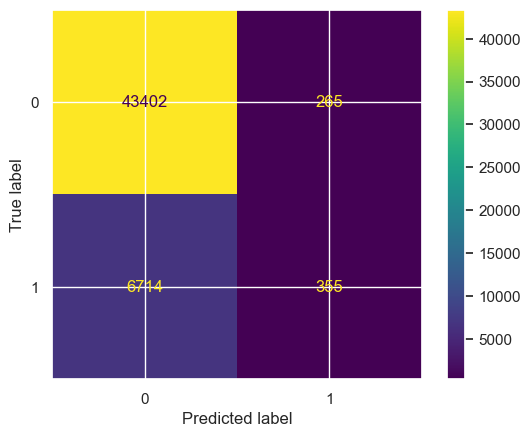

In [315]:
color = 'black'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

In [292]:
results = pd.concat([results, pd.DataFrame([{'Model': 'SVM (Default Params)', 'Fit_Time': end_time - start_time,'Score':svm_default_accuracy_score,'Max_Depth':0}])], ignore_index=True)
print(results)

                      Model     Fit_Time     Score  Max_Depth
0       Logistic Regression     0.122869  0.860415        0.0
1        K Nearest Neighbor    17.615237  0.860750        0.0
2  Decision Tree Classifier    18.542615  0.863199        7.0
3      SVM (Default Params)  2230.663658  0.862445        0.0


In [293]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}


In [294]:
svm_grid_search = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
svm_best_kernel_accuracy_score =accuracy_score(y_test,svm_grid_search.predict(X_test))
best_kernel = svm_grid_search.best_params_['kernel']

In [ ]:
print(svm_best_kernel_accuracy_score)
print(best_kernel)

In [ ]:
svm_cv_results = svm_grid_search.cv_results_
results = pd.concat([results, pd.DataFrame([{'Model': 'SVM (GridSearchCV) best kernel', 'Fit_Time': np.mean(svm_cv_results['mean_fit_time']),'Score':svm_best_kernel_accuracy_score,'Max_Depth':0}])], ignore_index=True)
print(results)

### Random Forest Classifier

In [316]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=8).fit(X_train, y_train)
end_time = time.time()
rf_model.feature_importances_

array([0.37776171, 0.29837494, 0.16595463, 0.09043396, 0.01207941,
       0.0235514 , 0.03184394])

In [317]:
y_pred = rf_model.predict(X_test)
rf_score =accuracy_score(y_test, y_pred)

In [318]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
print(cm)

[[43010   657]
 [ 6437   632]]


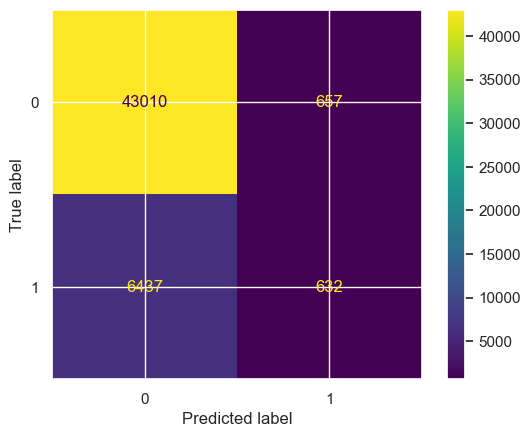

In [319]:
color = 'black'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()

In [320]:
# RF Model Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     43667
           1       0.49      0.09      0.15      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.54      0.54     50736
weighted avg       0.82      0.86      0.82     50736


In [321]:
results = pd.concat([results, pd.DataFrame([{'Model': 'Random Forest Classifier', 'Fit_Time': end_time - start_time,'Score':rf_score,'Max_Depth':0}])], ignore_index=True)
print(results)

                      Model     Fit_Time     Score  Max_Depth
0       Logistic Regression     0.122869  0.860415        0.0
1        K Nearest Neighbor    17.615237  0.860750        0.0
2  Decision Tree Classifier    18.542615  0.863199        7.0
3      SVM (Default Params)  2230.663658  0.862445        0.0
4  Random Forest Classifier     0.460712  0.860178        0.0


### Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions